## Q1

In [15]:
#Q1
import numpy as np
from scipy.interpolate import interp1d
from datetime import datetime

# Given discount factors
discount_factors = {
    '11/06/2024': 0.999057,
    '12/30/2024': 0.992199,
    '01/30/2025': 0.988398,
    '03/31/2025': 0.981428,
    '06/30/2025': 0.971558,
}


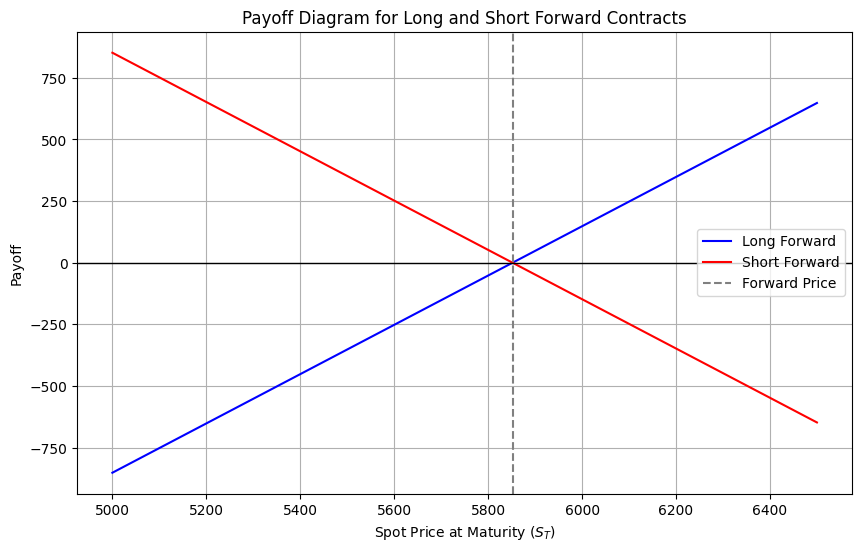

In [ ]:
# a
import numpy as np
import matplotlib.pyplot as plt

# Parameters
forward_price = 5852.0
spot_prices = np.linspace(5000, 6500, 100)  # Possible spot prices at maturity

# Payoff Calculations
long_forward_payoff = spot_prices - forward_price
short_forward_payoff = forward_price - spot_prices

# Plotting Payoff Diagram
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, long_forward_payoff, label="Long Forward", color="blue")
plt.plot(spot_prices, short_forward_payoff, label="Short Forward", color="red")
plt.axhline(0, color='black', lw=1)  # Horizontal line at payoff = 0
plt.axvline(forward_price, color='grey', linestyle='--', label="Forward Price")
plt.xlabel("Spot Price at Maturity ($S_T$)")
plt.ylabel("Payoff")
plt.title("Payoff Diagram for Long and Short Forward Contracts")
plt.legend()
plt.grid()
plt.show()


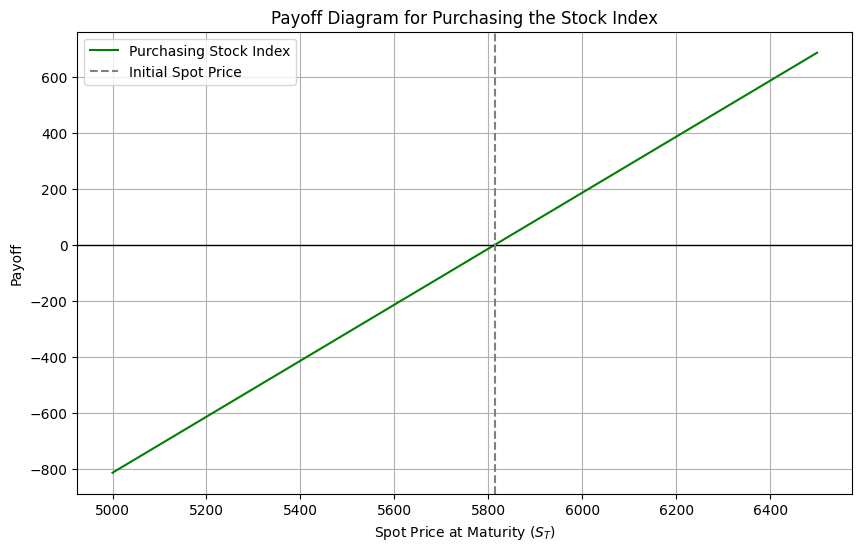

In [ ]:
# b
# Parameters
initial_spot_price = 5813.67

# Payoff Calculation for Purchasing Index
purchase_payoff = spot_prices - initial_spot_price

# Plotting Payoff Diagram
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, purchase_payoff, label="Purchasing Stock Index", color="green")
plt.axhline(0, color='black', lw=1)  # Horizontal line at payoff = 0
plt.axvline(initial_spot_price, color='grey', linestyle='--', label="Initial Spot Price")
plt.xlabel("Spot Price at Maturity ($S_T$)")
plt.ylabel("Payoff")
plt.title("Payoff Diagram for Purchasing the Stock Index")
plt.legend()
plt.grid()
plt.show()


Interpolated Discount Factor for 12/20/2024: 0.993469


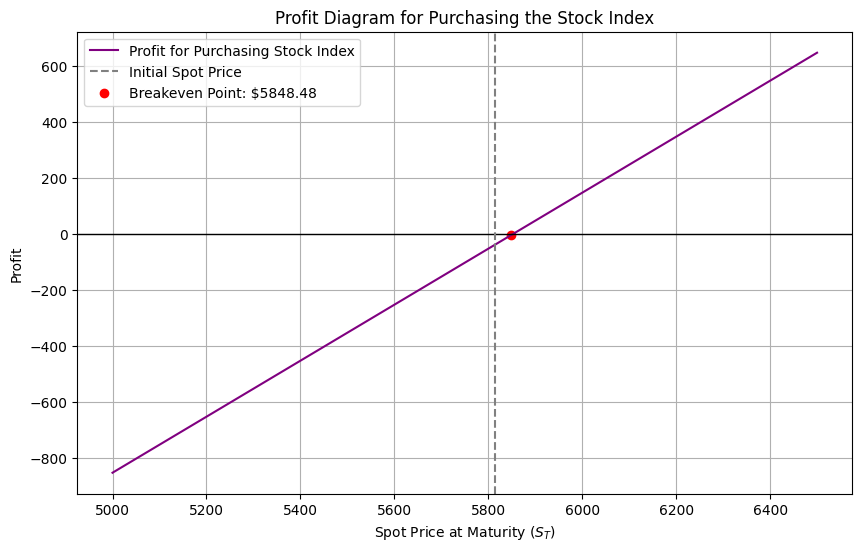

Breakeven Spot Price: 5848.48


In [ ]:
# Convert the date strings to datetime objects
base_date = datetime.strptime('10/30/2024', '%m/%d/%Y')
target_date = datetime.strptime('12/20/2024', '%m/%d/%Y')

dates = []
values = []

for date_str, discount_value in discount_factors.items():
    date = datetime.strptime(date_str, '%m/%d/%Y')
    days_from_base = (date - base_date).days
    dates.append(days_from_base)
    values.append(discount_value)

# Convert lists to numpy arrays for interpolation
dates = np.array(dates)
values = np.array(values)

interp_func = interp1d(dates, values, kind='linear', fill_value='extrapolate')
target_days_from_base = (target_date - base_date).days

discount_factor = interp_func(target_days_from_base)
print(f"Interpolated Discount Factor for 12/20/2024: {discount_factor:.6f}")

T = (51 / 365)  
risk_free_rate = -np.log(discount_factor) / T

spot_prices = np.linspace(5000, 6500, 100)  
initial_spot_price = 5813.67


profit = spot_prices - initial_spot_price - (risk_free_rate * initial_spot_price * T)

# Find the Breakeven Point
breakeven_index = np.argmin(np.abs(profit))
breakeven_spot_price = spot_prices[breakeven_index] 
breakeven_profit = profit[breakeven_index]

# Plotting Profit Diagram
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, profit, label="Profit for Purchasing Stock Index", color="purple")
plt.axhline(0, color='black', lw=1)  # Horizontal line at profit = 0
plt.axvline(initial_spot_price, color='grey', linestyle='--', label="Initial Spot Price")
plt.scatter(breakeven_spot_price, breakeven_profit, color='red', marker='o', label=f'Breakeven Point: ${breakeven_spot_price:.2f}')
plt.xlabel("Spot Price at Maturity ($S_T$)")
plt.ylabel("Profit")
plt.title("Profit Diagram for Purchasing the Stock Index")
plt.legend()
plt.grid()
plt.show()

print(f"Breakeven Spot Price: {breakeven_spot_price:.2f}")

## Q2

In [87]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_midpoint(bid, ask):
    return (bid + ask) / 2


# Part a: Payoff Diagram for Call Options
def plot_call_payoff(strikes, prices, stock_prices):
    plt.figure(figsize=(10, 6))
    for strike, price in zip(strikes, prices):
        payoff = np.maximum(stock_prices - strike, 0)
        plt.plot(stock_prices, payoff, label=f"Call Strike {strike}")
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payoff")
    plt.title("Payoff Diagram for Call Options")
    plt.legend()
    plt.grid(True)
    plt.show()

# Part b: Profit Diagram for Put Options
def plot_put_profit(strikes, prices, stock_prices):
    plt.figure(figsize=(10, 6))
    for strike, price in zip(strikes, prices):
        payoff = np.maximum(strike - stock_prices, 0) - price
        plt.plot(stock_prices, payoff, label=f"Put Strike {strike}")
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Profit")
    plt.title("Profit Diagram for Put Options")
    plt.legend()
    plt.grid(True)
    plt.show()

# Part c: Payoff Diagram for Short 140 Put and Short 150 Call
def plot_portfolio_payoff(stock_prices, put_strike, call_strike, put_price, call_price):
    put_payoff = -np.maximum(put_strike - stock_prices, 0)
    call_payoff = -np.maximum(stock_prices - call_strike, 0)
    total_payoff = put_payoff + call_payoff
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, total_payoff, label=f"Short {put_strike} Put & Short {call_strike} Call", color='r')
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payoff")
    plt.title("Payoff Diagram for Short Put and Short Call Portfolio")
    plt.legend()
    plt.grid(True)
    plt.show()

# Part d: Profit Diagram for Short 140 Put and Short 150 Call
def plot_portfolio_profit(stock_prices, put_strike, call_strike, put_price, call_price):
    put_payoff = -np.maximum(put_strike - stock_prices, 0) + put_price
    call_payoff = -np.maximum(stock_prices - call_strike, 0) + call_price
    total_profit = put_payoff + call_payoff
    
    max_profit = np.max(total_profit)
    max_index = np.argmax(total_profit)
    max_price = stock_prices[max_index]
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, total_profit, label=f"Profit for Short {put_strike} Put & Short {call_strike} Call", color='g')
    plt.axhline(y=max_profit, color='r', linestyle='--', label=f"Highest Profit: {max_profit:.2f} at Stock Price: {max_price:.2f}")
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Profit")
    plt.title("Profit Diagram for Short Put and Short Call Portfolio")
    plt.legend()
    plt.grid(True)
    plt.show()

# Part e: Calculate Range of Future Stock Prices for Positive Profit (Considering SOFR Discounting)
def calculate_positive_profit_range(put_strike, call_strike, put_price, call_price, discount_factor):
    # Calculate total premium received
    total_premium = put_price + call_price
    
    discounted_premium = total_premium / discount_factor
    
    # Calculate break-even points
    lower_break_even = put_strike - discounted_premium
    upper_break_even = call_strike + discounted_premium
    
    print(f"Range of future stock prices for positive profit (considering discounting): {lower_break_even:.2f} to {upper_break_even:.2f}")


# Part f: Payoff Diagram for Complex Position
def plot_complex_portfolio(stock_prices, put_prices, call_prices, discount_factor):
    # Long 140 Call, Short 140 Put, Long 145 Put, Short 145 Call
    long_call_140 = np.maximum(stock_prices - 140, 0)
    short_put_140 = -np.maximum(140 - stock_prices, 0)
    long_put_145 = np.maximum(145 - stock_prices, 0)
    short_call_145 = -np.maximum(stock_prices - 145, 0)
    
    total_payoff = long_call_140 + short_put_140 + long_put_145 + short_call_145
    initial_payoff = (- call_prices[1] + put_prices[1] - put_prices[2] + call_prices[2]) / discount_factor
    total_profit = total_payoff + initial_payoff

    # Plot Payoff Diagram
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, total_payoff, label="Payoff for Complex Option Portfolio", color='b')
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payoff")
    plt.title("Payoff Diagram for Complex Option Portfolio")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Profit Diagram
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, total_profit, label="Profit for Complex Option Portfolio", color='g')
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Profit")
    plt.title("Profit Diagram for Complex Option Portfolio")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Total Payoff:",total_payoff[0],"Total Profit:",total_profit[0])


In [86]:
call_strikes = [135, 140, 145, 150]
put_strikes = [135, 140, 145, 150]

call_bids = [14.40, 11.85, 9.55, 7.65]
call_asks = [14.55, 11.95, 9.65, 7.70]

put_bids = [8.6, 10.95, 13.70, 16.85]
put_asks = [8.7, 11.10, 13.85, 16.90]

call_prices = [calculate_midpoint(bid, ask) for bid, ask in zip(call_bids, call_asks)]
put_prices = [calculate_midpoint(bid, ask) for bid, ask in zip(put_bids, put_asks)]

stock_prices = np.linspace(100, 200, 500)


In [88]:
call_prices[1],call_prices[2], put_prices[1], put_prices[2]

(11.899999999999999, 9.600000000000001, 11.024999999999999, 13.774999999999999)

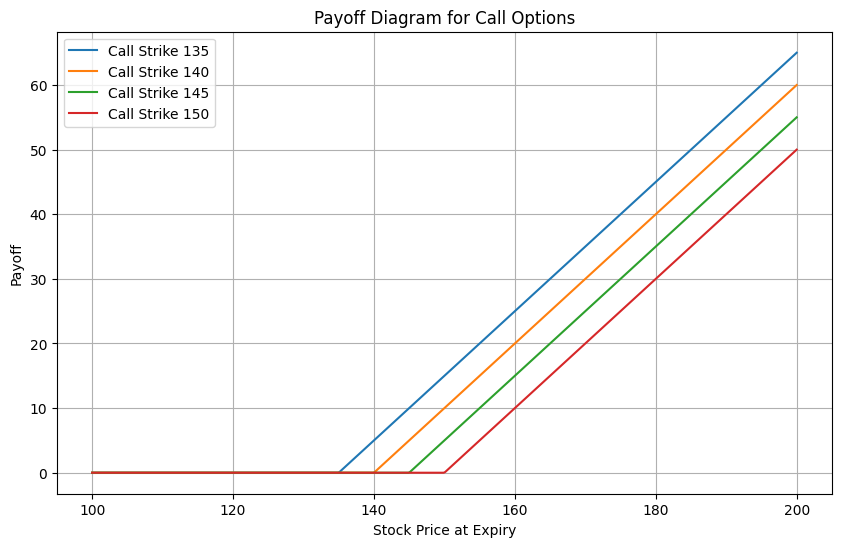

In [89]:
# a)
plot_call_payoff(call_strikes, call_prices, stock_prices)

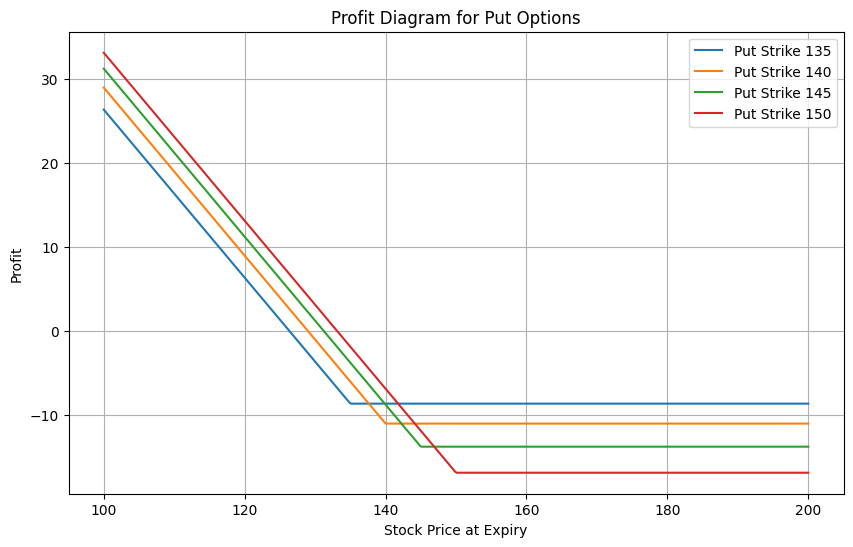

In [90]:
# b
plot_put_profit(put_strikes, put_prices, stock_prices)

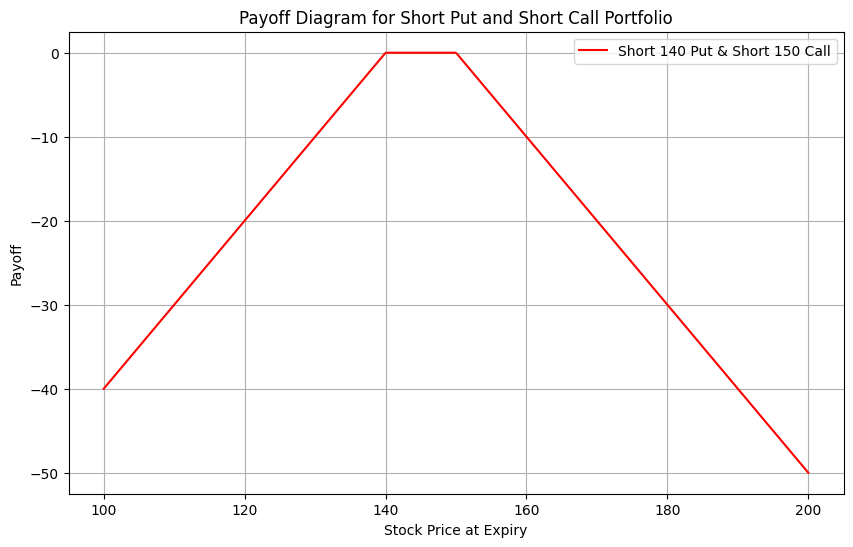

In [91]:
# c
plot_portfolio_payoff(stock_prices, put_strike=140, call_strike=150, put_price=put_prices[1], call_price=call_prices[3])


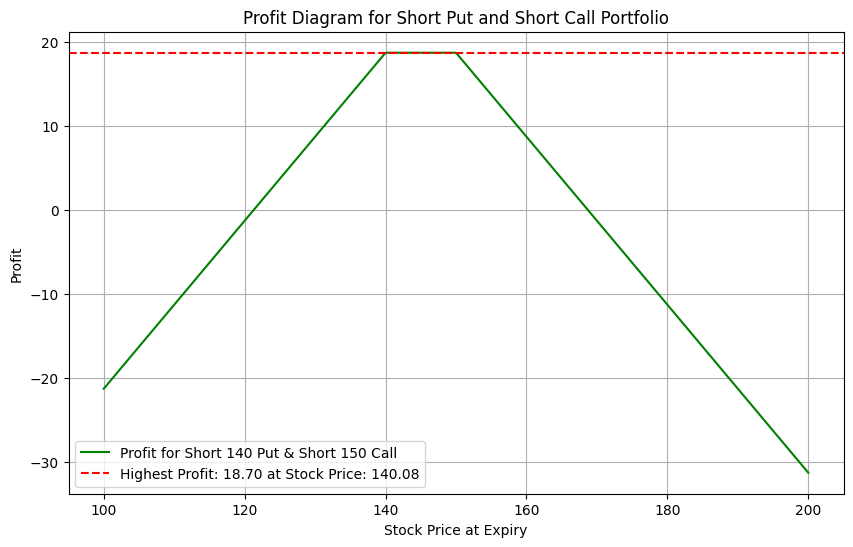

In [92]:
# d
plot_portfolio_profit(stock_prices, put_strike=140, call_strike=150, put_price=put_prices[1], call_price=call_prices[3])

In [93]:
# e
calculate_positive_profit_range(put_strike=140, call_strike=150, put_price=put_prices[1], call_price=call_prices[3], discount_factor=discount_factor)

Range of future stock prices for positive profit (considering discounting): 121.18 to 168.82


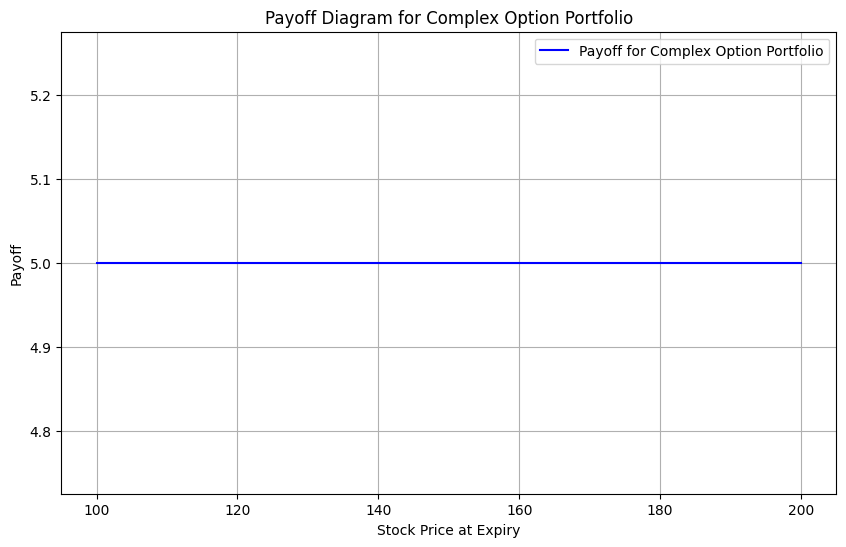

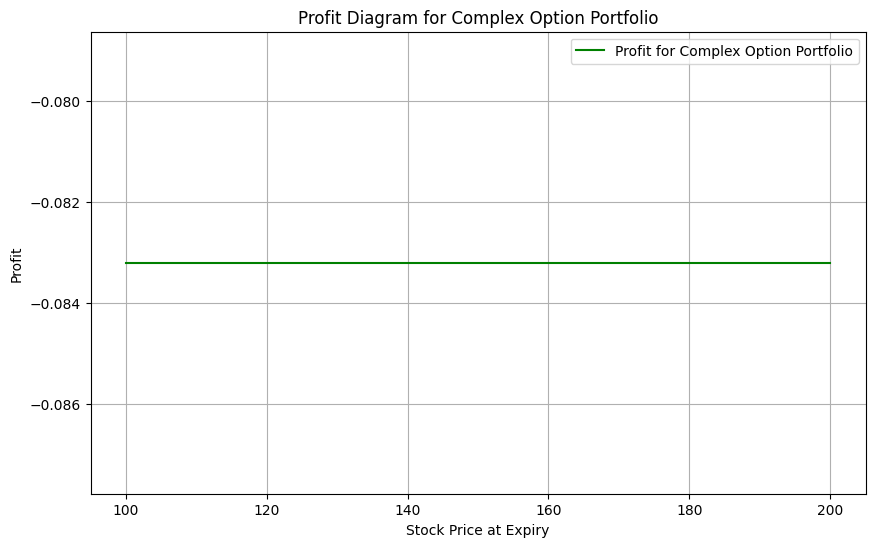

Total Payoff: 5.0 Total Profit: -0.08319836854496376


In [94]:
# f
plot_complex_portfolio(stock_prices, put_prices=put_prices, call_prices=call_prices, discount_factor=discount_factor)

## Q3

In [81]:
# Part 3: Payoff and Profit Diagrams for Microsoft Options (Q3)
def plot_msft_payoff_profit(stock_prices, spot_price, put_strike, call_strike, put_bid, put_ask, call_bid, call_ask, discount_factor):
    # Calculate the midpoint prices
    put_price = calculate_midpoint(put_bid, put_ask)
    call_price = calculate_midpoint(call_bid, call_ask)
    
    # Long Microsoft stock payoff
    long_stock_payoff = stock_prices
    
    # Long put option payoff
    long_put_payoff = np.maximum(put_strike - stock_prices, 0)
    
    # Short call option payoff
    short_call_payoff = -np.maximum(stock_prices - call_strike, 0)
    
    # Total payoff
    total_payoff = long_stock_payoff + long_put_payoff + short_call_payoff 
    
    # Profit calculation (taking into account premiums)
    total_profit = total_payoff - put_price/discount_factor + call_price/discount_factor- spot_price/discount_factor
    
    # Plotting payoff diagram
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, total_payoff, label="Payoff for MSFT Position", color='b')
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payoff")
    plt.title("Payoff Diagram for Microsoft Position (Long Stock, Long Put, Short Call)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plotting profit diagram
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, total_profit, label="Profit for MSFT Position", color='g')
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Profit")
    plt.title("Profit Diagram for Microsoft Position (Long Stock, Long Put, Short Call)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Total Profit:",total_profit[0])


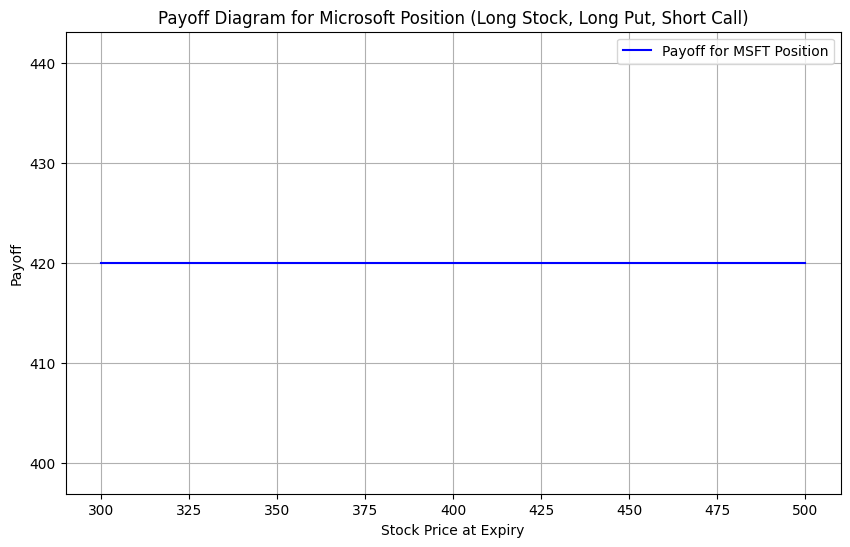

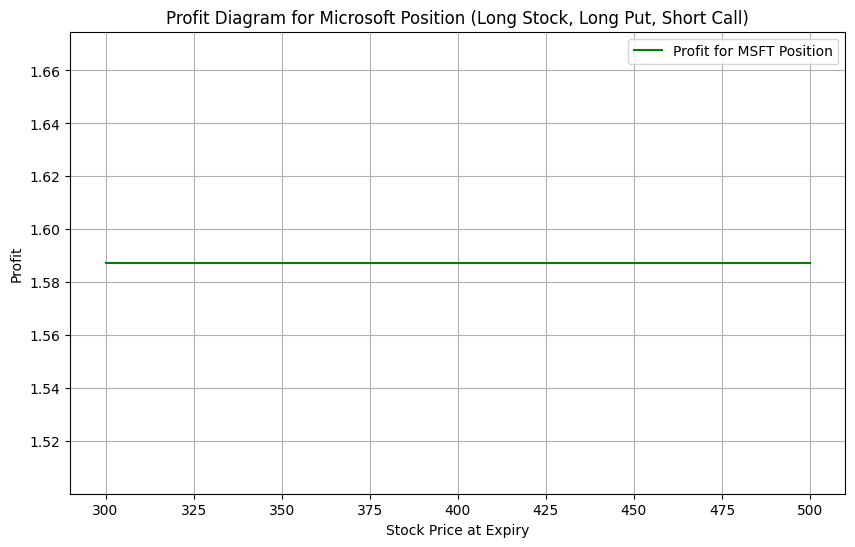

Total Profit: 1.5873469630154773


In [82]:
# Question 3 Data
msft_spot_price = 432.53
msft_put_strike = 420
msft_call_strike = 420
msft_put_bid = 10.45
msft_put_ask = 10.65
msft_call_bid = 27.30
msft_call_ask = 27.50


plot_msft_payoff_profit(stock_prices=np.linspace(300, 500, 500), spot_price=msft_spot_price,
                         put_strike=msft_put_strike, call_strike=msft_call_strike,
                           put_bid=msft_put_bid, put_ask=msft_put_ask, 
                           call_bid=msft_call_bid, call_ask=msft_call_ask,
                           discount_factor=discount_factor)


The positive price difference shows that there is theoretical arbitrage opportunity by owning such portfolio.